## Pair Programming Decision Tree

En el pair programming de hoy debéis usar el csv que guardastéis cuando hicistéis el pairprgramming de codificicación (este csv debería tener las variables estadandarizas).

En pairprogramming anteriores ajustastéis vuestro datos a una regresión lineal. 
El objetivo de hoy es:

 - Ajustar el modelo a un Decision Tree
 - Extraer las métricas
 - Debatid entre vosotras que modelo es mejor y por qué (basándose en las métricas)

In [1]:
# Tratamiento de datos
# ------------------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Modelado y evaluación
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV

# Configuración warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('once')

In [2]:
df = pd.read_csv("../datos/sephora_website_dataset4.csv", index_col = 0)
df.head()

,category,rating,number_of_reviews,love,price,value_price,MarketingFlags,MarketingFlags_content,online_only,exclusive,limited_edition,limited_time_offer,rating_norm,rating_log,rating_raiz,rating_minmax,MarketingFlags_map,MarketingFlags_content_map2
id,,,,,,,,,,,,,,,,,,
2218774,Fragrance,4.0,4,3002,66.0,75.0,True,online only,1,0,0,0,0.001996,1.386294,2.000000,NaN,1,2
2044816,Cologne,4.5,76,2700,66.0,66.0,True,online only,1,0,0,0,0.101996,1.504077,2.121320,NaN,1,2
1417567,Perfume,4.5,26,2600,180.0,180.0,True,online only,1,0,0,0,0.101996,1.504077,2.121320,NaN,1,2
1417617,Perfume,4.5,23,2900,120.0,120.0,True,online only,1,0,0,0,0.101996,1.504077,2.121320,NaN,1,2
2218766,Fragrance,3.5,2,943,72.0,80.0,True,online only,1,0,0,0,-0.098004,1.252763,1.870829,NaN,1,2


In [3]:
df.drop(columns=["rating_raiz","rating_log","rating_norm"], inplace=True)
df

,category,rating,number_of_reviews,love,price,value_price,MarketingFlags,MarketingFlags_content,online_only,exclusive,limited_edition,limited_time_offer,rating_minmax,MarketingFlags_map,MarketingFlags_content_map2
id,,,,,,,,,,,,,,,
2218774,Fragrance,4.0,4,3002,66.0,75.0,True,online only,1,0,0,0,NaN,1,2
2044816,Cologne,4.5,76,2700,66.0,66.0,True,online only,1,0,0,0,NaN,1,2
1417567,Perfume,4.5,26,2600,180.0,180.0,True,online only,1,0,0,0,NaN,1,2
1417617,Perfume,4.5,23,2900,120.0,120.0,True,online only,1,0,0,0,NaN,1,2
2218766,Fragrance,3.5,2,943,72.0,80.0,True,online only,1,0,0,0,NaN,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2208502,Face Masks,2.0,15,6200,6.0,6.0,True,limited edition · exclusive,0,1,1,0,NaN,1,4
2298909,Lip Sets,0.0,0,266,15.0,27.0,True,exclusive,0,1,0,0,NaN,1,1
2236750,Tinted Moisturizer,0.0,0,445,16.0,16.0,True,exclusive,0,1,0,0,NaN,1,1


In [4]:
df.sample()

,category,rating,number_of_reviews,love,price,value_price,MarketingFlags,MarketingFlags_content,online_only,exclusive,limited_edition,limited_time_offer,rating_minmax,MarketingFlags_map,MarketingFlags_content_map2
id,,,,,,,,,,,,,,,
2269934,Face Sunscreen,3.5,16,1500,145.0,145.0,False,0,0,0,0,0,NaN,0,0


In [5]:
df.drop(columns=["MarketingFlags","MarketingFlags_content"], inplace=True)


In [6]:
df.drop(columns=["rating_minmax"], inplace=True)

In [7]:
df.drop(columns=["category"], inplace=True)

In [8]:
df

,rating,number_of_reviews,love,price,value_price,online_only,exclusive,limited_edition,limited_time_offer,MarketingFlags_map,MarketingFlags_content_map2
id,,,,,,,,,,,
2218774,4.0,4,3002,66.0,75.0,1,0,0,0,1,2
2044816,4.5,76,2700,66.0,66.0,1,0,0,0,1,2
1417567,4.5,26,2600,180.0,180.0,1,0,0,0,1,2
1417617,4.5,23,2900,120.0,120.0,1,0,0,0,1,2
2218766,3.5,2,943,72.0,80.0,1,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...
2208502,2.0,15,6200,6.0,6.0,0,1,1,0,1,4
2298909,0.0,0,266,15.0,27.0,0,1,0,0,1,1
2236750,0.0,0,445,16.0,16.0,0,1,0,0,1,1


- Separamos nuestros dataframe en x e y

In [9]:
X = df.drop("rating", axis =1)
y= df["rating"]

In [10]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

- Ajustamos el modelo

In [11]:
arbol = DecisionTreeRegressor(random_state =0)
arbol.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

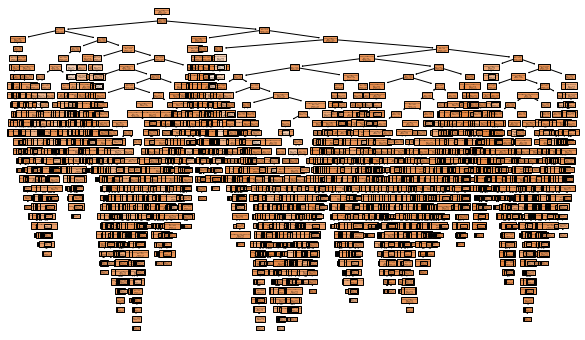

In [13]:
fig = plt.figure(figsize = (10,6))
tree.plot_tree(arbol, feature_names = x_train.columns, filled = True)
plt.show()

- Seleccionamos los hiperparámetros

In [14]:
#vemos la profundidad que debemos poner en nuestro modelo, es un máximo de 4 (la raiz cuadrada del número de variables predictoras)
max_features = np.sqrt(len(x_train.columns))
max_features

3.3166247903554

In [15]:
#max_depth (la profundidad que puede alcanzar un arbol de decisión)
print(arbol.tree_.max_depth)

34


In [16]:
y_pred_test_dt = arbol.predict(x_test)
y_pred_train_dt = arbol.predict(x_train)

In [17]:
def metricas(y_test, y_train, y_test_pred, y_train_pred, tipo_modelo):
    
    
    resultados = {'MAE': [mean_absolute_error(y_test, y_test_pred), mean_absolute_error(y_train, y_train_pred)],
                'MSE': [mean_squared_error(y_test, y_test_pred), mean_squared_error(y_train, y_train_pred)],
                'RMSE': [np.sqrt(mean_squared_error(y_test, y_test_pred)), np.sqrt(mean_squared_error(y_train, y_train_pred))],
                'R2':  [r2_score(y_test, y_test_pred), r2_score(y_train, y_train_pred)],
                 "set": ["test", "train"]}
    df = pd.DataFrame(resultados)
    df["modelo"] = tipo_modelo
    return df

In [18]:

dt_results1 = metricas(y_test, y_train, y_pred_test_dt, y_pred_train_dt, "Decission Tree I")
dt_results1

,MAE,MSE,RMSE,R2,set,modelo
0,0.501908,0.580834,0.762125,0.417923,test,Decission Tree I
1,0.000000,0.000000,0.000000,1.000000,train,Decission Tree I


In [19]:
param = {"max_depth": [2,4, 6], # teniendo en cuenta que teníamos overfitting tendremos que reducir la profundidad del modelo, la nuestra anterior era de 17. Bajaremos mucho este valor ya que teníamos un overfitting muy claro
        "max_features": [1,2,3,4],# calculamos en celdas anteriores, probaremos a hacer el modelo como una variable, 2, 3 y 4. Ponemos como límite el 4 ya que es el resultado de la raiz cuadrada. 
        # estos dos hiperparámetros son más difíciles de definir, pero usualmente se suelen elegir los siguientes valores
        "min_samples_split": [10, 50, 100],
        "min_samples_leaf": [10,50,100]} 

In [20]:

gs = GridSearchCV(
            estimator=DecisionTreeRegressor(), 
            param_grid= param, 
            cv=10, 
            verbose=-1, 
            return_train_score = True, 
            scoring="neg_mean_squared_error") 

In [21]:
gs.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [2, 4, 6], 'max_features': [1, 2, 3, 4],
                         'min_samples_leaf': [10, 50, 100],
                         'min_samples_split': [10, 50, 100]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=-1)

In [22]:
mejor_modelo = gs.best_estimator_
mejor_modelo

DecisionTreeRegressor(max_depth=6, max_features=4, min_samples_leaf=10,
                      min_samples_split=10)

In [23]:
y_pred_test_dt2 = mejor_modelo.predict(x_test)
y_pred_train_dt2 = mejor_modelo.predict(x_train)

In [24]:
dt_results2 = metricas(y_test, y_train, y_pred_test_dt2, y_pred_train_dt2, "Decision tree II")
dt_results2

,MAE,MSE,RMSE,R2,set,modelo
0,0.451962,0.456184,0.675414,0.542840,test,Decision tree II
1,0.436365,0.413721,0.643212,0.594267,train,Decision tree II


In [25]:
df_decision_results = pd.concat([dt_results1, dt_results2], axis = 0)
df_decision_results

,MAE,MSE,RMSE,R2,set,modelo
0,0.501908,0.580834,0.762125,0.417923,test,Decission Tree I
1,0.000000,0.000000,0.000000,1.000000,train,Decission Tree I
0,0.451962,0.456184,0.675414,0.542840,test,Decision tree II
1,0.436365,0.413721,0.643212,0.594267,train,Decision tree II


In [29]:
df_decision_results.to_csv("resultados_sephora_LR_DT.csv")

- descartamos "Decission Tree I" vemos que R2 train el valor es de 1, es decir, hay OVERFIT

In [ ]:

# vamos a crearnos un dataframe 
importancia_predictores = pd.DataFrame(
                            {'predictor': x_train.columns,
                             'importancia': mejor_modelo.feature_importances_}
                            )


# ordenamos de mayor a menor los resultados
importancia_predictores.sort_values(by=["importancia"], ascending=False, inplace = True)

# printeamos los resultados
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
2,love,0.447465
1,number_of_reviews,0.408796
10,MarketingFlags_content_map2,0.079925
3,price,0.039921
4,value_price,0.016981
0,id,0.006911
5,online_only,0.000000
6,exclusive,0.000000
7,limited_edition,0.000000
8,limited_time_offer,0.000000


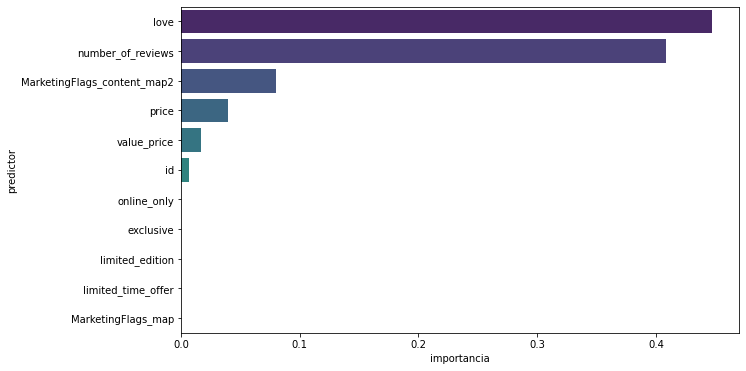

In [ ]:

plt.figure(figsize=(10,6))
sns.barplot(x = "importancia", y = "predictor", data = importancia_predictores, palette="viridis");
plt.show()

No nos es posible decidir qué modelo es mejor ya que nuestros datos son incompatibles con una regresión lineal simple. En el siguiente pair comparamos el decision con el random forest. 

In [ ]:
df.to_csv("../datos/sephora_website_dataset5.csv")